References: [Loan Approval Prediction](https://www.kaggle.com/ajaymanwani/loan-approval-prediction/notebook)

Step 1: Set state number 

In [1]:
# replace 888 with the last three digits of your student id
# and then press CTRL + Enter
my_state_number = 673

Step 2: Read the data_set.csv

In [2]:
import pandas as pd
data = pd.read_csv("data_set.csv")

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Step 3: Sample the data randomly the data and save the dataframe as myNewData 

In [3]:
myNewData = data.sample(frac =.90, replace = False, random_state = my_state_number) 

Start the Analytics using **myNewData** dataframe as the raw data
note: your *myNewData* dataframe may be different from other students' *myNewData* dataframe

# Import dependencies

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Data Exploration

## Dataset Details

### Data Shape

In [5]:
# Start your codes
myNewData.shape

(553, 13)

The data has 553 rows (data) and 13 columns (features).

### Data Information

In [6]:
myNewData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 461 to 66
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             541 non-null    object 
 2   Married            551 non-null    object 
 3   Dependents         540 non-null    object 
 4   Education          553 non-null    object 
 5   Self_Employed      523 non-null    object 
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         535 non-null    float64
 9   Loan_Amount_Term   541 non-null    float64
 10  Credit_History     507 non-null    float64
 11  Property_Area      553 non-null    object 
 12  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


All columns are of the `object` datatype except for `ApplicantIncome` that has `int64` type, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History` of `float64` type. There are missing data where some columns do not have all 553 rows, which will be treated under the `Null Value Check` section The column names are inconsistent where some uses underscores and some using pure `CamelCase`, which will be treated under the `Column Renaming` section.

### Index Dropping

Dropping `Loan_ID` before any data analysis is conducted as it does not offer any real meaning.

In [7]:
myNewData = myNewData.drop(columns='Loan_ID')

### Column Renaming

Renaming of data columns for a more consistent experience. `CamelCase` will be used.

In [8]:
myNewData = myNewData.rename(columns={'Self_Employed': 'SelfEmployed', 'Loan_Amount_Term': 'LoanAmountTerm', 'Credit_History': 'CreditHistory', 'Property_Area': 'PropertyArea', 'Loan_Status': 'LoanStatus'})

### Nature of Data

In [9]:
myNewData.head()

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
461,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
196,Male,No,0,Graduate,No,8333,3750.0,187.0,360.0,1.0,Rural,Y


From the table above, it is known that numerical variables are `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount`. The rest are categorical variables.

In [10]:
cat_data = (myNewData.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])).columns.values
num_data = (myNewData[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]).columns.values

### Data Description

In [11]:
myNewData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory
count,553.000000,553.000000,535.000000,541.000000,507.000000
mean,5479.320072,1577.437468,147.319626,341.656192,0.852071
std,6357.052607,2916.184573,87.882458,65.922795,0.355380
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2833.000000,0.000000,100.000000,360.000000,1.000000
50%,3813.000000,1086.000000,128.000000,360.000000,1.000000
75%,5780.000000,2250.000000,167.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


The statistics above describe numerical data columns. It can be known that the data values of these columns are spread across a large range. For example, `ApplicantIncome` has a maximum value of 81000 whereas `CreditHistory` has a maximum value of only 1. These data values need to be scaled for better model accuracy. More on scaling under the `Data Scaling` section.

## Data Exploration

### Data Distribution

Exploring the dataset's general distribution pattern.

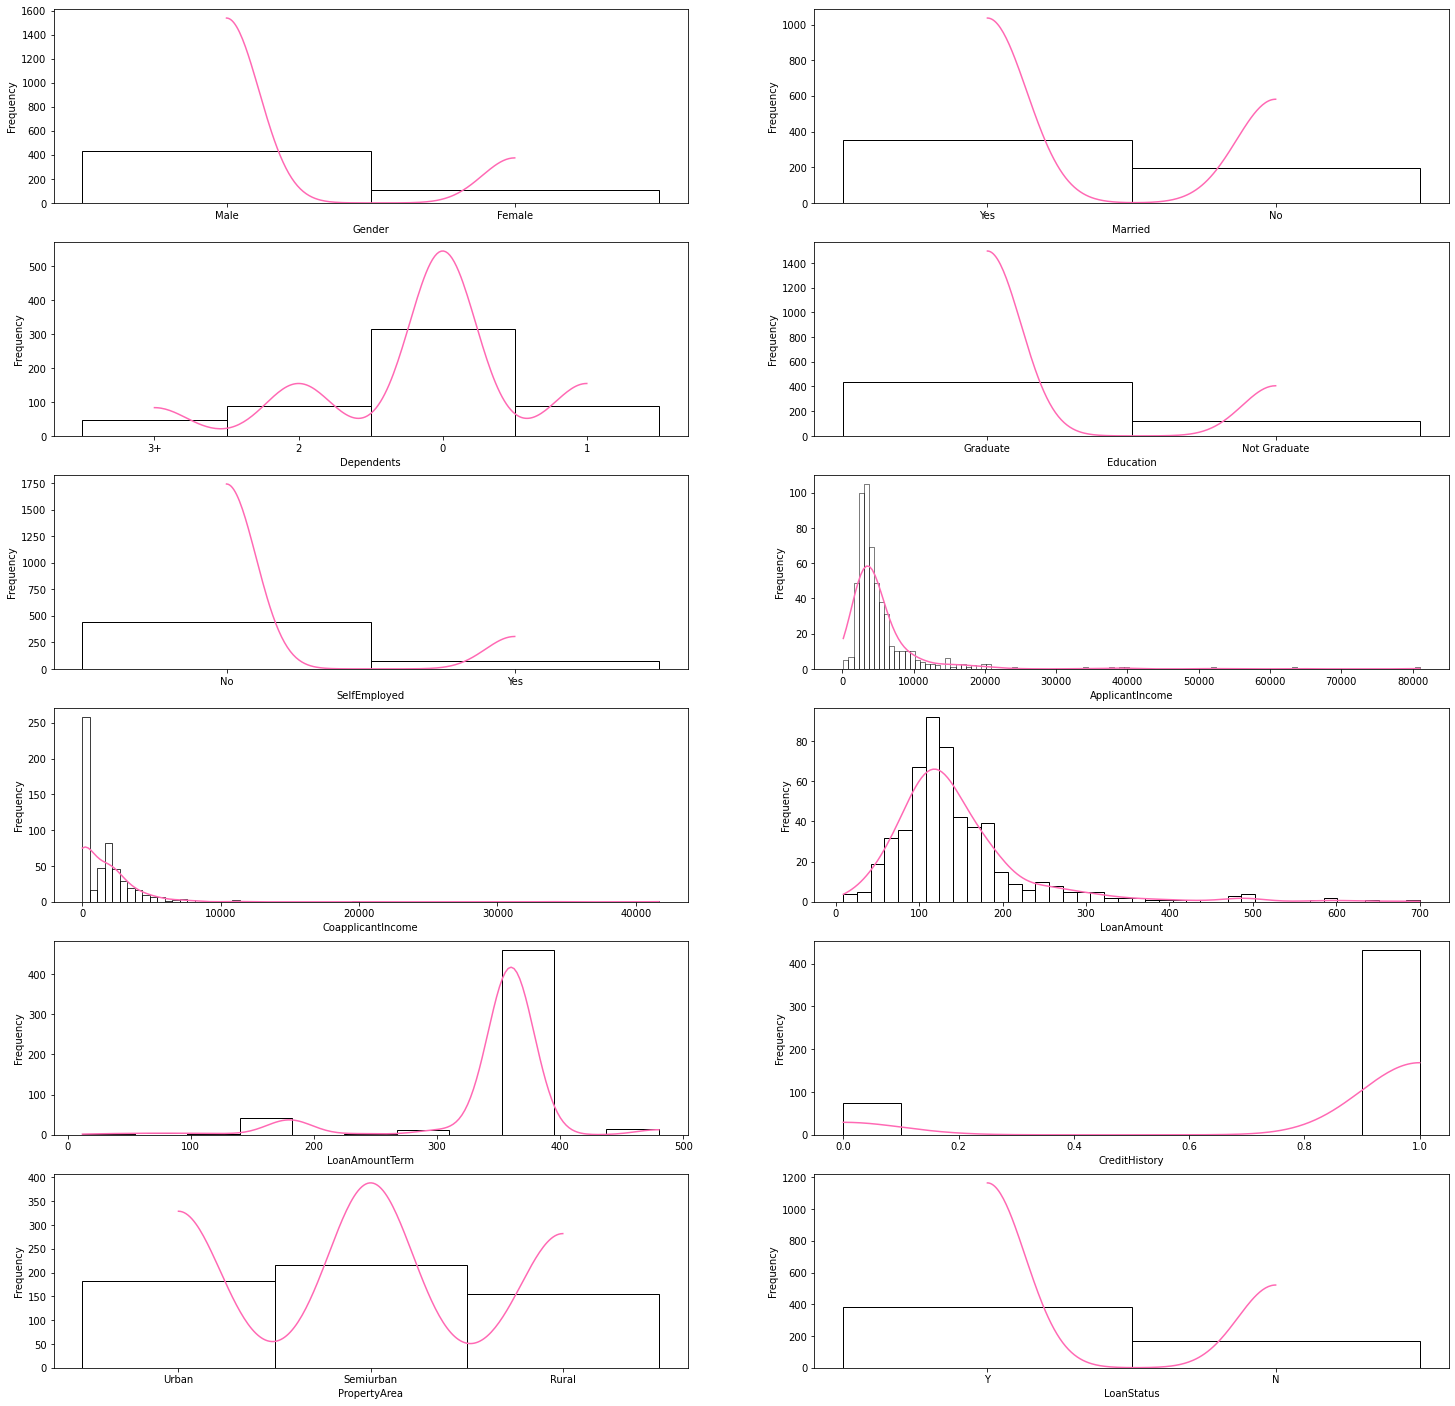

In [12]:
cols = list(myNewData.columns.values)

fig, ax = plt.subplots(6, 2, figsize=(25,25))
# fig.suptitle('Distribution of Dataset')

ax = ax.flatten() # ax is flattened from a 2D array to a 1D array, use ax.T.flatten() to transpose if needed

for i in range(len(cols)):
    sns.histplot(data=myNewData, ax=ax[i], x=cols[i], kde=True, color='hotpink', alpha=0)
    ax[i].set(xlabel=cols[i], ylabel='Frequency')

As shown from the graph above, there are five data distributions that do not follow a bell-shaped curve, which are all binary variables. All other data follows a normal distribution pattern. This analysis suggests that data standardisation instead of data normalisation might be applied onto the dataset.

### Categorical Data Analysis

Analysing categorical variables. Exploring the relationships between the features and the target variable (`LoanStatus`).

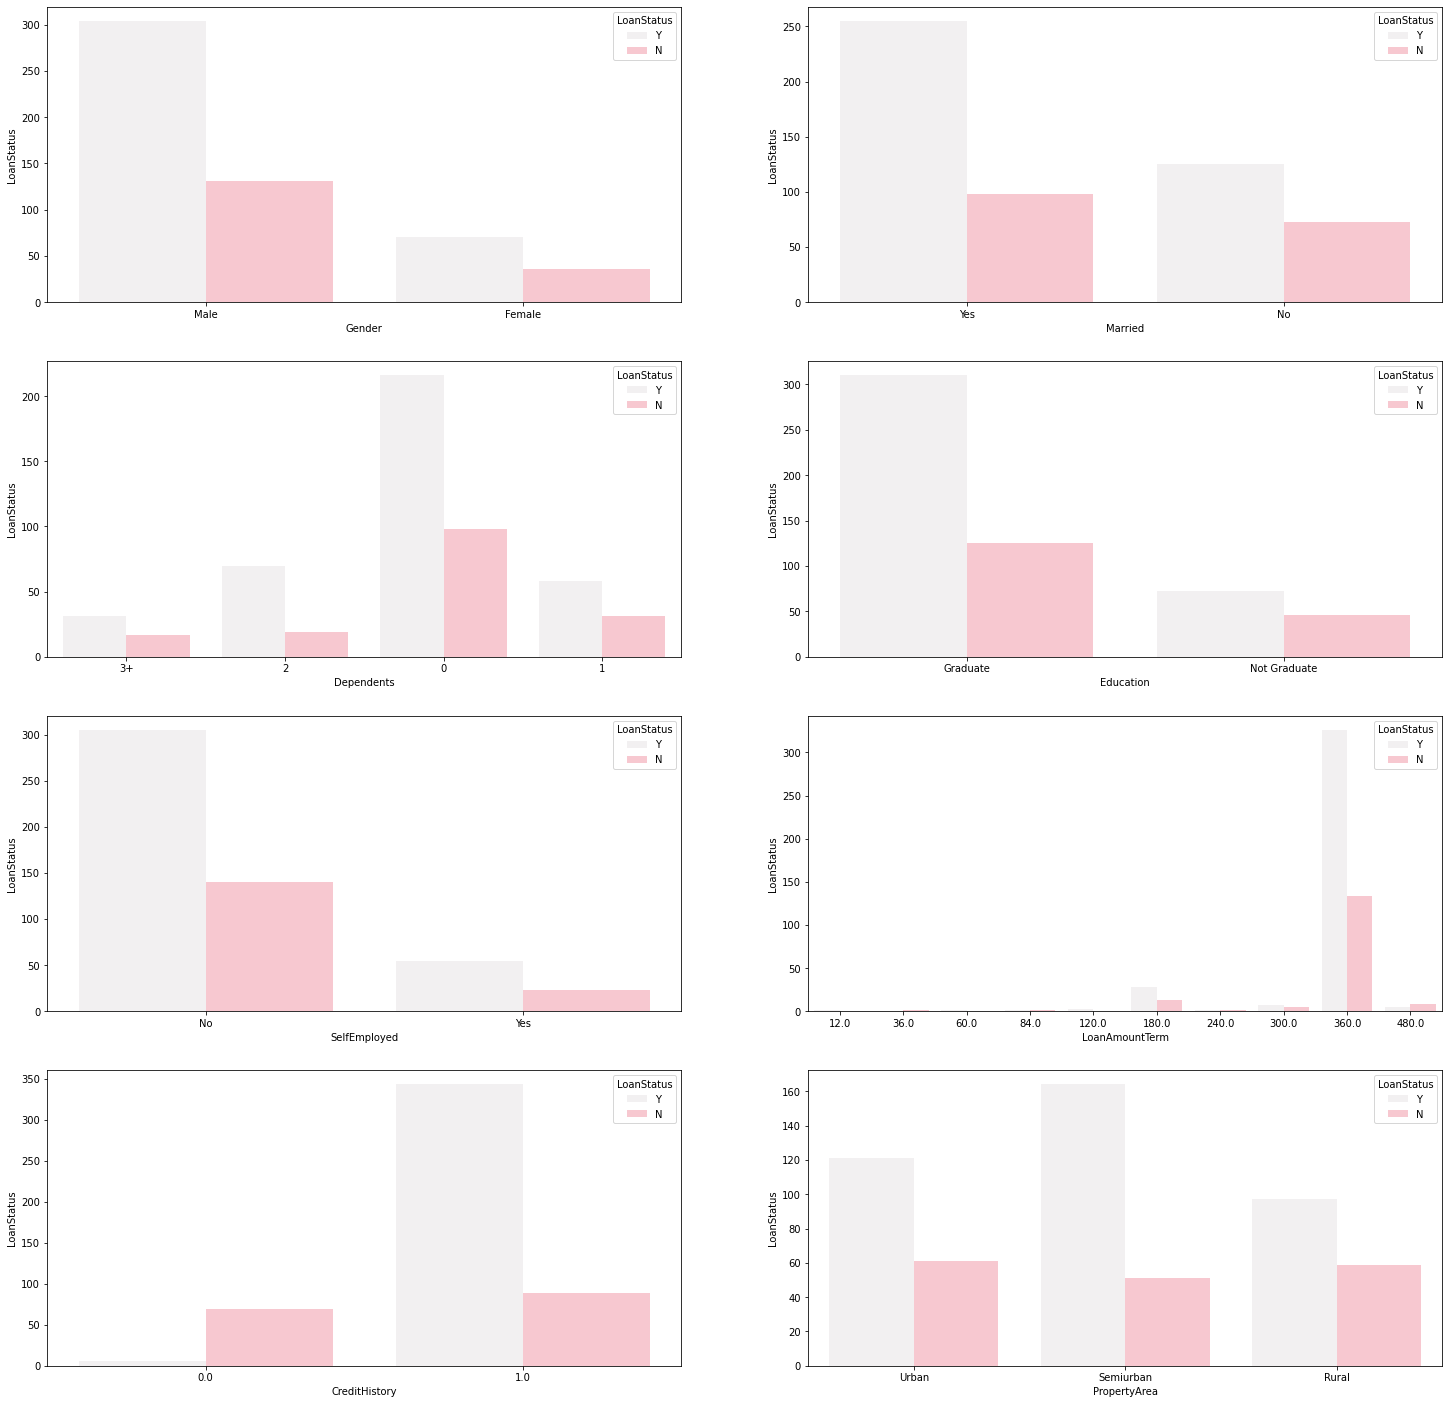

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(25,25))

ax = ax.flatten()

for i, v in enumerate(cat_data):
    if(v == 'LoanStatus'):
        continue
    sns.countplot(data=myNewData, ax=ax[i], x=v, hue='LoanStatus', color='pink', alpha=1)
    ax[i].set(xlabel=v, ylabel='LoanStatus')

1. Around 3/5 applications have been approved.
2. There are approximately 3 times more male applicants than female.
3. Around 3/5 applicants are married. Married applicants are more likely to be granted loans.
4. Around 3/5 of the applicants have zero dependents. They are more likely to be granted loans.
5. Around 4/5 of the applicants are graduates, who are also more likely to be granted loans.
6. Less than 1/5 of the applicants are self-employed, who are not as likely to be granted loans as their counterparts.
7. Majority of the applicants have applied for a 30-year loan (360 months).
8. Applicants without credit history are unlikely to be granted loans.
9. There are more applicants from the semiurban property area and they are more likely to be granted loans.

### Numerical Data Analysis

Analysing numerical columns.

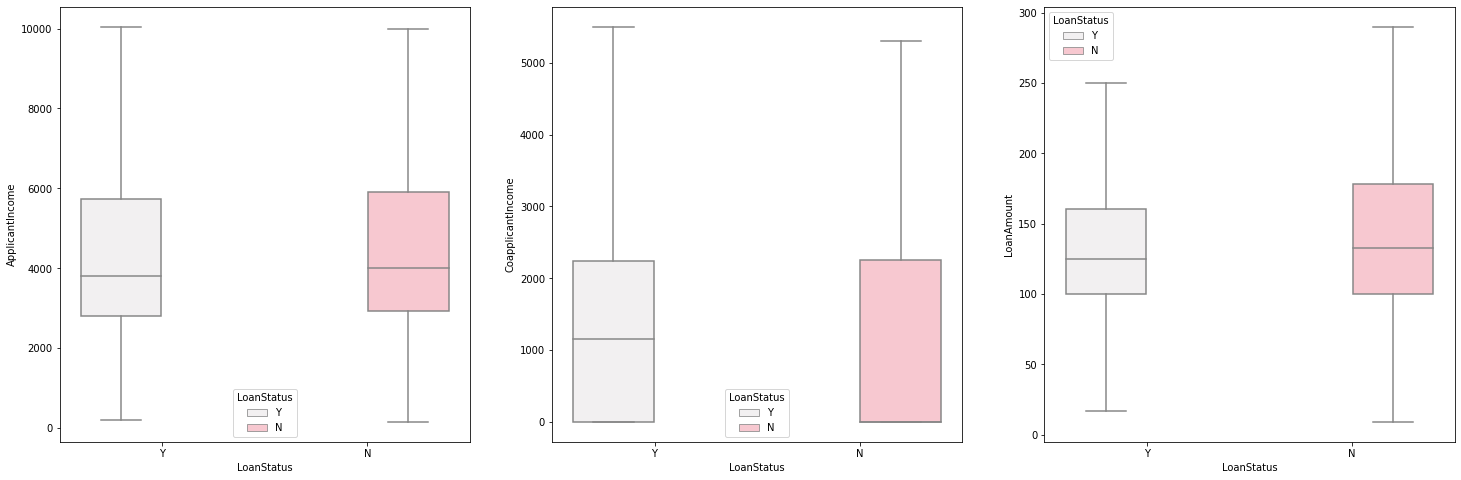

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(25,8))

ax = ax.flatten()

for i, v in enumerate(num_data):
    if(v == 'LoanStatus'):
        continue
    sns.boxplot(data=myNewData, ax=ax[i], x='LoanStatus', y=v, hue='LoanStatus', color='pink', showfliers=False)
    ax[i].set(xlabel='LoanStatus', ylabel=v)

It seems that these numerical variables do not have a significant relationship to `LoanStatus` as the boxes of `Y` and `N` do not have a significant difference between them. The boxplot is constructed based on the interquarile range score (IQR), and anything below 1/5 IQR below Q1 or more than 1.5 IQR above Q3 are considered as outliers. However,  the `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount` features would only have natural outliers, which means these outliers are not a result of measurement error. Non-natural outliers are outliers resulted by measurement error, such as a measurement for the temperature. Hence, these natural outliers should not be dropped as they can reflect the true conditions of society. Removing these outliers would be a harsh step. Therefore, the `showfliers` attribute is set to `False` so that outliers are not shown on the boxplot graph.

# Data Preprocessing

### Null Value Check

Checking for null values.

In [15]:
myNewData.isnull().sum()

Gender               12
Married               2
Dependents           13
Education             0
SelfEmployed         30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
LoanAmountTerm       12
CreditHistory        46
PropertyArea          0
LoanStatus            0
dtype: int64

There are null values in the columns `Gender`, `Married`, `Dependents`, `SelfEmployed`, `LoanAmount`, `LoanAmountTerm`, `CreditHistory`.

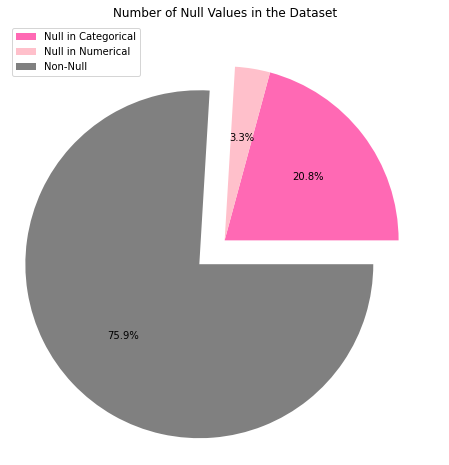

In [16]:
x = ['Null in Categorical', 'Null in Numerical', 'Non-Null']
y = [myNewData[cat_data].isnull().values.sum(), myNewData[num_data].isnull().values.sum(), myNewData.shape[0] - myNewData.isnull().values.sum()]

fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.pie(y, colors=['hotpink', 'pink', 'gray'], explode=[0, 0, 0.2], autopct='%1.1f%%')
plt.legend(x)
plt.title("Number of Null Values in the Dataset")
plt.show()

In [17]:
print('Null Values in Categorical:', myNewData[cat_data].isnull().values.sum())
print('Null Values in Numerical:', myNewData[num_data].isnull().values.sum())
print('Total Null Values:', myNewData.isnull().values.sum())

Null Values in Categorical: 115
Null Values in Numerical: 18
Total Null Values: 133


The total number of rows with missing data is 133, which is almost 1/5 of the dataset. Removing all these data might cause biasness in the model as the remaining dataset will be quite small. Therefore, the treatment approach will be taken.

### Simple Imputation

There are a total of 115 rows of data which is 20.8% percent of the data that are categorical in nature. These rows will be imputed using the `SimpleImputer` class by using the data with the highest frequency. On the other hand, numerical data will be imputed with the mean of the column. Mean is used because it best represents the average.

In [18]:
for _, v in enumerate(cat_data):
    myNewData[v] = myNewData[v].fillna(myNewData[v].value_counts().index[0]) # Fill categorical data with the highest frequency

for _, v in enumerate(num_data):
    myNewData[v] = myNewData[v].fillna(myNewData[v].mean()) # Fill numerical data with column mean

myNewData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

### Data Encoding

#### Label Encoding

Encoding categorical data values to be numerical for easier further processing. Label encoding is used for binary categorical columns such as `gender`, and these feature columns are renamed in such a way that 0 is false and 1 is true for the column to replicate the effect of one-hot encoding. The reason of not directly applying one-hot encoding to these columns is because it is quite redundant to do so, since the columns are already binary and very close to the form of one-hot encoding.

In [19]:
# Define columns to be processed
binary = ['Gender', 'Married', 'Education', 'SelfEmployed', 'CreditHistory', 'LoanStatus']

# Instantiate encoder
label_encoder = LabelEncoder()

# Process columns
for _, v in enumerate(binary):
    myNewData[v] = label_encoder.fit_transform(myNewData[v])

In [20]:
myNewData2 = myNewData.rename(columns={'Gender': 'Male', 'Education': 'Graduate', 'LoanStatus': 'LoanApproved'})
myNewData2

,Male,Married,Dependents,Graduate,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanApproved
461,1,1,3+,0,0,7740,0.0,128.0,180.0,1,Urban,1
597,1,0,0,0,0,2987,0.0,88.0,360.0,0,Semiurban,0
455,1,1,2,0,0,3859,0.0,96.0,360.0,1,Semiurban,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1,Urban,1
196,1,0,0,0,0,8333,3750.0,187.0,360.0,1,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,1,2,0,0,6250,1695.0,210.0,360.0,1,Semiurban,1
566,1,0,0,0,0,3333,0.0,70.0,360.0,1,Urban,1
229,1,0,0,0,1,6400,0.0,200.0,360.0,1,Rural,1
408,1,1,1,0,0,8300,0.0,152.0,300.0,0,Semiurban,0


#### One-Hot Encoding

`PropertyArea` and `Dependents` columns will be encoded using one-hot encoding. Since each unique value in the column will be transformed into a new feature, one feature can be dropped because if all other columns are false, the value must be the last feature. Hence, to avoid multicollinearity and redundancy, the `drop='first'` parameter is used to remove the first column of the categories.

In [21]:
# Define columns to be processed
onehot = ['Dependents', 'PropertyArea']

myNewData3 = myNewData2

# Instantiate encoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Process columns
for _, v in enumerate(onehot):
    tmp = onehot_encoder.fit_transform(np.reshape(myNewData2[v].values, (-1, 1)))
    
    # Join returned array to dataframe
    categories = onehot_encoder.categories_[0][1:]
    myNewData3[categories] = tmp
    myNewData3 = myNewData3.drop(columns=[v])
    
    # Rename columns fpr easier processing
    for _, w in enumerate(categories):
        myNewData3 = myNewData3.rename(columns={w: v + "_" + w})

myNewData3

,Male,Married,Graduate,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,LoanApproved,Dependents_1,Dependents_2,Dependents_3+,PropertyArea_Semiurban,PropertyArea_Urban
461,1,1,0,0,7740,0.0,128.0,180.0,1,1,0.0,0.0,1.0,0.0,1.0
597,1,0,0,0,2987,0.0,88.0,360.0,0,0,0.0,0.0,0.0,1.0,0.0
455,1,1,0,0,3859,0.0,96.0,360.0,1,1,0.0,1.0,0.0,1.0,0.0
6,1,1,1,0,2333,1516.0,95.0,360.0,1,1,0.0,0.0,0.0,0.0,1.0
196,1,0,0,0,8333,3750.0,187.0,360.0,1,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1,1,0,0,6250,1695.0,210.0,360.0,1,1,0.0,1.0,0.0,1.0,0.0
566,1,0,0,0,3333,0.0,70.0,360.0,1,1,0.0,0.0,0.0,0.0,1.0
229,1,0,0,1,6400,0.0,200.0,360.0,1,1,0.0,0.0,0.0,0.0,0.0
408,1,1,0,0,8300,0.0,152.0,300.0,0,0,1.0,0.0,0.0,1.0,0.0


### Column Dropping

Dropping columns to avoid multicollinearity. Multicollinearity is when two or more features are highly correlated with one another. This effect might reduce the reliability in determining the effect of each independent feature on the target variable (`LoanStatus`), making it hard to interpret the model. A correlation matrix is computed and a heatmap is used to visualise the results.

<AxesSubplot:title={'center':'Heatmap for Correlation Matrix on Dataset'}>

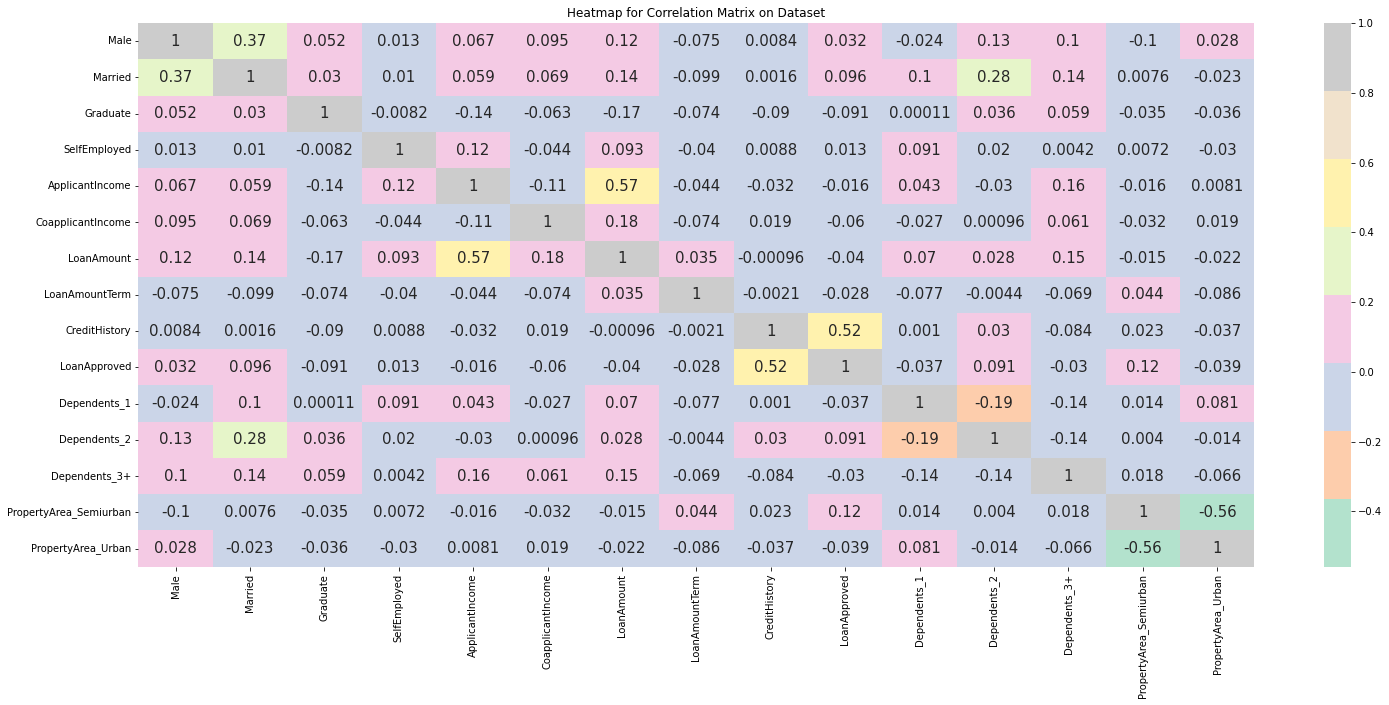

In [22]:
plt.figure(figsize=(25, 10))
plt.title('Heatmap for Correlation Matrix on Dataset')
sns.heatmap(myNewData3.corr(), cmap='Pastel2', annot=True, annot_kws={'size': 15})

From the heatmap, it is generally known that there is no variables with correlation higher than 0.8, so no additional variables will be dropped.

In [23]:
df = myNewData3

### Data Splitting

Splitting of features and target label. The dataset has already been randomised earlier on. Split dataset into training and test sets using the 70:30 ratio for training:testing.

In [24]:
X_df = df.drop('LoanApproved', axis=1)
y_df = df['LoanApproved']

In [25]:
# Split 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3)

## Data Scaling
As per the `Data Description` section, data scaling is much needed for this dataset.
<br />
<br />
Algorithms based on gradient descent such as **linear regression** and **neural network** perform better with scaled data because the data values will affect the step size of the gradient descent. The gradient descent will converge more quickly towards the minima when using data on a similar scale. 
<br />
<br />
Distance-based algorithms such as **KNN** and **SVM** are most affected by the range of data values as they calculate the distances between data points to find the similarity. The algorithms will stress more on features with data of a higher value, causing the model to be biased.
<br />
<br />
**Tree-based algorithms** are quite insensitive to the data scales because the tree splits on a feature without taking other features into consideration.

### Standardisation

There are two main scaling techinques, that are **normalisation** and **standardisation**. Normalisation will transform all values to fit in the range of 0 and 1, also known as min-max scaling. Standardisation turns the mean value into 0 and the other values centred around the mean value will have a unit standard deviation. There is no particular range to this scaling method.
<br />
<br />
Normalisation is used when the data distribution does not follow a Gaussian distribution, especially for KNN and neural networks, but it is very prone to outliers. Standardisation is helpful when the data follows a Gaussian distribution, but it is not necessarily so. Outliers in the data will not be affected by standardisation. The mean and standard deviation will be rescaled in such a way that they are very close to 0 and 1 respectively.
<br />
<br />
In this case, the dataset will be standardised using the `StandardScaler` because most of the data follows a Gaussian distribution.

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.48623217, -1.27775313, -0.48623217, ..., -0.30532006,
        -0.82620137,  1.43924583],
       [ 0.48623217,  0.78262379, -0.48623217, ..., -0.30532006,
        -0.82620137,  1.43924583],
       [ 0.48623217,  0.78262379, -0.48623217, ..., -0.30532006,
         1.21035869, -0.69480833],
       ...,
       [ 0.48623217,  0.78262379, -0.48623217, ..., -0.30532006,
        -0.82620137, -0.69480833],
       [ 0.48623217,  0.78262379,  2.05663067, ...,  3.27525155,
        -0.82620137, -0.69480833],
       [ 0.48623217,  0.78262379, -0.48623217, ..., -0.30532006,
        -0.82620137,  1.43924583]])

# Model Selection

First of all, this is a classification problem as the goal is to predict whether the applicant will be granted a loan, which means the model is required to classify the applicant into `LoanApproved` either yes or no based on his given features.
<br />
<br />
Therefore, the models that will be trained and evaluated for comparison are k neighbour classifier, decision tree classififer and random forest classfier.

In [41]:
def predict(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)

    # Make training data prediction
    pred = model.predict(X_train)

    # Calculate training data accuracy
    train_acc = accuracy_score(y_train, pred)
    print("Training Accuracy:", train_acc)

    # Make prediction
    pred = model.predict(X_test)

    # Test accuracy
    test_acc = accuracy_score(y_test, pred)
    print("Testing Accuracy:", test_acc)

    # Confusion Matrix
    conf_matr = confusion_matrix(y_test, pred, labels=model.classes_)
    
    # Visualise confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=model.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

    # Show classification report
    class_report = classification_report(y_test, pred, output_dict=True)
    print("Classification Report:\n", classification_report(y_test, pred))

    return train_acc, test_acc, conf_matr, class_report 


The above is a reusable function for all models.

## K Neighbour Classifier

KNN is a very simple model that can sometimes outperform complex mdels such as ANNs and SVMs. It basically utilises the distance between two data points. There will be a circle of data points, and one data point is compared to the other data points. The closest data points will be grouped together. The typical K value to start with is 3.

### First Round

Training Accuracy: 0.8604651162790697
Testing Accuracy: 0.7530120481927711


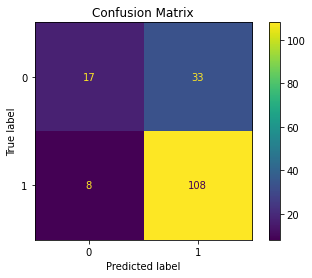

Classification Report:
 {'0': {'precision': 0.68, 'recall': 0.34, 'f1-score': 0.4533333333333334, 'support': 50}, '1': {'precision': 0.7659574468085106, 'recall': 0.9310344827586207, 'f1-score': 0.8404669260700388, 'support': 116}, 'accuracy': 0.7530120481927711, 'macro avg': {'precision': 0.7229787234042553, 'recall': 0.6355172413793103, 'f1-score': 0.6469001297016861, 'support': 166}, 'weighted avg': {'precision': 0.7400666495770315, 'recall': 0.7530120481927711, 'f1-score': 0.7238604222336819, 'support': 166}}


In [28]:
# Instantiate model
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_train_acc, knn_acc, knn_cm, knn_cr = predict(knn_model, X_train, X_test, y_train, y_test)

The training accuracy of the KNN model is higher than the testing accuracy at the first round, which indicates that the model is overfitting. Therefore, grid search is used to tackle this overfitting problem.

### Grid Search

Finding the best K value for KNN to improve the model performance.

In [29]:
# Define parameters
params = {
    'n_neighbors': [3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search
gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=params,
    verbose=1
)

gs_results = gs.fit(X_train, y_train)

print("Best Score:", gs_results.best_score_)
print("Best Estimator:", gs_results.best_estimator_)
print("Best Params:", gs_results.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Score: 0.7804861804861805
Best Estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


From the grid search conducted above, the best cross-validated score of the best estimator is shown. The K value is also shown here with the suitable `weights`.

### Fine-tuning

Using the grid search results above, another KNN model is instantiated and trained.

Training Accuracy: 0.8036175710594315
Testing Accuracy: 0.7530120481927711


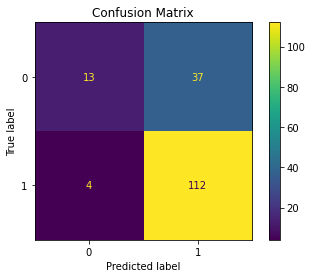

Classification Report:
 {'0': {'precision': 0.7647058823529411, 'recall': 0.26, 'f1-score': 0.3880597014925373, 'support': 50}, '1': {'precision': 0.7516778523489933, 'recall': 0.9655172413793104, 'f1-score': 0.8452830188679247, 'support': 116}, 'accuracy': 0.7530120481927711, 'macro avg': {'precision': 0.7581918673509672, 'recall': 0.6127586206896551, 'f1-score': 0.6166713601802309, 'support': 166}, 'weighted avg': {'precision': 0.7556019577718692, 'recall': 0.7530120481927711, 'f1-score': 0.7075651521885912, 'support': 166}}


In [30]:
# Instantiate model
knn_model = KNeighborsClassifier(n_neighbors=7)

knn_train_acc, knn_acc, knn_cm, knn_cr = predict(knn_model, X_train, X_test, y_train, y_test)

After fine-tuning the model, the training accuracy of the KNN model has decreased and testing accuracy has increased, which is a good percentage. Precision for true negatives and true positives are higher. Recall is however lower for negative cases, but higher for positive cases. The F1 score is basically higher than the previous model.
<br />
<br />
A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.
<br />
<br />
This model has a relatively high precision and relatively lower recall. It means this model tends to return lesser but mostly correct results. 0 stands for loan not granted and 1 for loan granted.

## Decision Tree

A decision tree basically works by splitting a node when it evaluates on an attribute. Each branch is the outcome of the test and each leaf node represents the class label.

### First Round

Training Accuracy: 1.0
Testing Accuracy: 0.6626506024096386


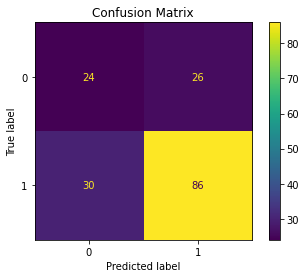

Classification Report:
 {'0': {'precision': 0.4444444444444444, 'recall': 0.48, 'f1-score': 0.4615384615384615, 'support': 50}, '1': {'precision': 0.7678571428571429, 'recall': 0.7413793103448276, 'f1-score': 0.7543859649122806, 'support': 116}, 'accuracy': 0.6626506024096386, 'macro avg': {'precision': 0.6061507936507937, 'recall': 0.6106896551724138, 'f1-score': 0.607962213225371, 'support': 166}, 'weighted avg': {'precision': 0.6704436794798242, 'recall': 0.6626506024096386, 'f1-score': 0.666178885582817, 'support': 166}}


In [31]:
# Instantiate the model
tree_model = DecisionTreeClassifier()

tree_train_acc, tree_acc, tree_cm, tree_cr = predict(tree_model, X_train, X_test, y_train, y_test)

The training accuracy is higher than the testing accuracy, indicating overfitting in the model.

### Hyperparameter Tuning

The `max_depth` of the tree needs to be limited for a better performance.

In [32]:
def predict_tuning(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)

    # Make training data prediction
    pred = model.predict(X_train)

    # Calculate training data accuracy
    train_acc = accuracy_score(y_train, pred)

    # Make prediction
    pred = model.predict(X_test)

    # Test accuracy
    test_acc = accuracy_score(y_test, pred)

    # Confusion Matrix
    conf_matr = confusion_matrix(y_test, pred, labels=model.classes_)

    # Show classification report
    class_report = classification_report(y_test, pred, output_dict=True)

    return train_acc, test_acc, conf_matr, class_report 


Above is the `predict()` function modified not to print anything, as reiterating it for many times in the tuning step will yield an extremely long output.

<AxesSubplot:xlabel='max_depth', ylabel='accuracy'>

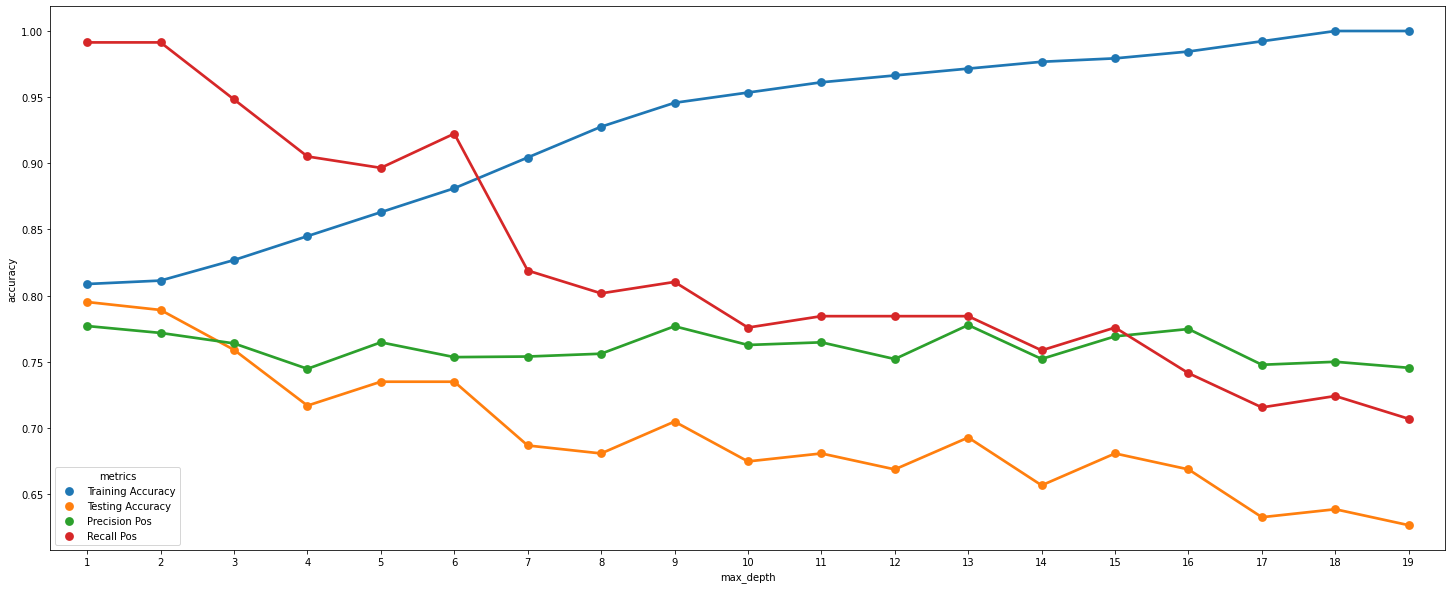

In [45]:
training_accuracy = []
testing_accuracy = []
precision_pos = []
recall_pos = []
tree_depths = []

for depth in range(1,20):
    tree_model = DecisionTreeClassifier(max_depth=depth)
    
    tree_train_acc, tree_acc, tree_cm, tree_cr = predict_tuning(tree_model, X_train, X_test, y_train, y_test)
    
    training_accuracy.append(tree_train_acc)
    testing_accuracy.append(tree_acc)
    precision_pos.append(tree_cr['1']['precision'])
    recall_pos.append(tree_cr['1']['recall'])
    tree_depths.append(depth)
    

tuning_max_depth = {"Training Accuracy": training_accuracy, "Testing Accuracy": testing_accuracy, "Precision Pos": precision_pos, "Recall Pos": recall_pos, "max_depth": tree_depths }
tuning_max_depth_df = pd.DataFrame.from_dict(tuning_max_depth)

plot_df = tuning_max_depth_df.melt('max_depth',var_name='metrics',value_name="accuracy")
fig,ax = plt.subplots(figsize=(25,10))
sns.pointplot(x="max_depth", y="accuracy",hue="metrics", data=plot_df,ax=ax)

From the graph above, it can be known the optimal `max_depth` is equal to 1 as the precision, recall and accuracy are relatively high.

Training Accuracy: 0.8087855297157622
Testing Accuracy: 0.7951807228915663


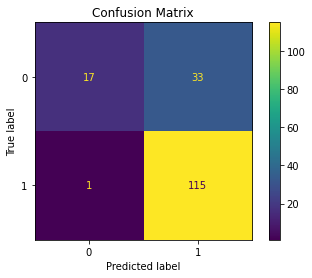

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.34      0.50        50
           1       0.78      0.99      0.87       116

    accuracy                           0.80       166
   macro avg       0.86      0.67      0.69       166
weighted avg       0.83      0.80      0.76       166



In [42]:
tree_model = DecisionTreeClassifier(max_depth=1)

tree_train_acc, tree_acc, tree_cm, tree_cr = predict(tree_model, X_train, X_test, y_train, y_test)

In [48]:
dot_data = export_graphviz(tree_model, feature_names=X_df.columns.tolist())
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH